In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import random
import csv
import cv2

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [4]:
model = load_model('model_relu_128_64.h5') #loading the neural network from h5 file

In [5]:
test_loss_model, test_accuracy_model = model.evaluate(test_images, test_labels)
print(f'Accuracy of the neural network on the {test_images.shape[0]} test images: {test_accuracy_model*100:.2f}%')

313/313 [==============================] - 1s 2ms/step - loss: 0.0836 - accuracy: 0.9748
Accuracy of the neural network on the 10000 test images: 97.48%


In [6]:
def view_classify(image, probabilities): #function to display predictions by the neural network
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(image, cmap='gray')
    ax1.axis('off')
    ax2.barh(np.arange(10), probabilities)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0,1.1)
    plt.tight_layout()

#### Prediction 

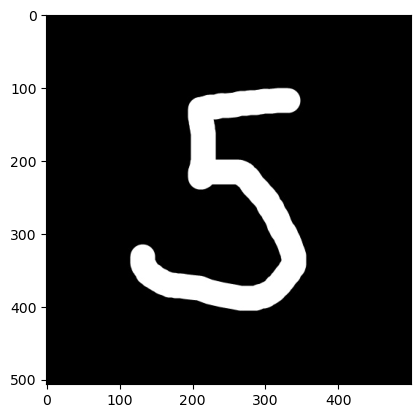

In [10]:
img = cv2.imread("D:/VS CODE PROGRAMS/ML-CODES-VS/Machine Learning/test images/5_new.jpg", 0) #loading the image itself
img = img.astype(np.float32)/255.0 #normalizing the image
plt.imshow(img, cmap= 'gray')

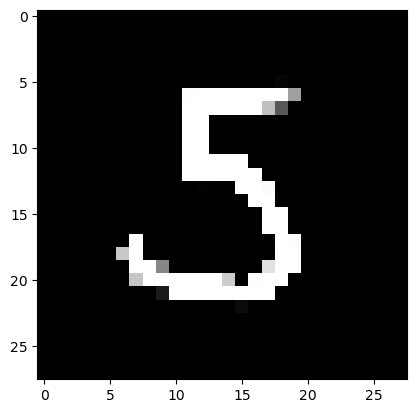

In [11]:
img_resized = cv2.resize(img,(28,28)) #resizing the image to feed into the network
plt.imshow(img_resized, cmap= 'gray')

1/1 [==============================] - 0s 35ms/step


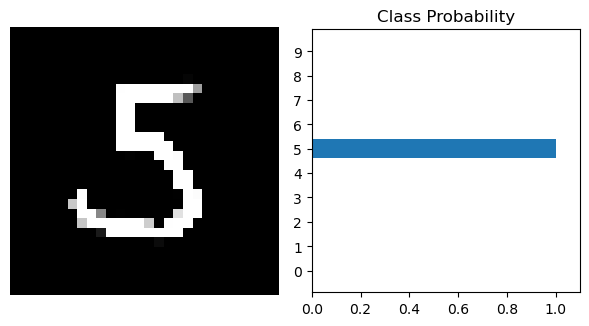

In [12]:
probabilities = model.predict(img_resized.reshape(1,28,28,1))  #predicting (batch_size =1, height = 28, width = 28, channel = 1)
view_classify(img_resized, probabilities[0])